In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import plot_phase_portrait, plot_phase_portrait_nonlinear
from scipy.integrate import solve_ivp
from tqdm import tqdm

## Data


In [2]:
# load data and convert to numpy form
x_0 = pd.read_csv ('../../data/nonlinear_vectorfield_data_x0.txt', sep = ' ', names=['x0_1', 'x0_2']).to_numpy()
x_1 = pd.read_csv ('../../data/nonlinear_vectorfield_data_x1.txt', sep = ' ', names=['x0_1', 'x0_2']).to_numpy()
N, d = x_0.shape


## Task 1: LInear Approximation

In [3]:
# Use linear approximation to approximate the derivative of the evolution function.
dt = 0.01
v = (x_1 - x_0) / dt

# least square to solve a linear equation
A, res, rank, sigma = np.linalg.lstsq(x_0, v, rcond=-1) # solution, residual, rank, singular values
pred = x_0 + (A @ x_0.T).T * dt

# mean square error
mse = ((x_1 - pred ) ** 2).sum() / N
mse

0.03728697125740119

<AxesSubplot:>

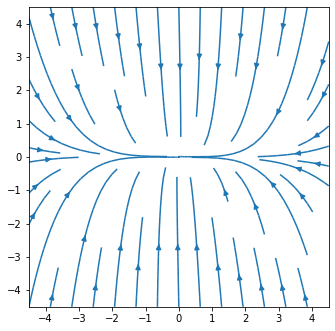

In [4]:
# plot the phase portrait
w = 4.5
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
plot_phase_portrait(A, X, Y)

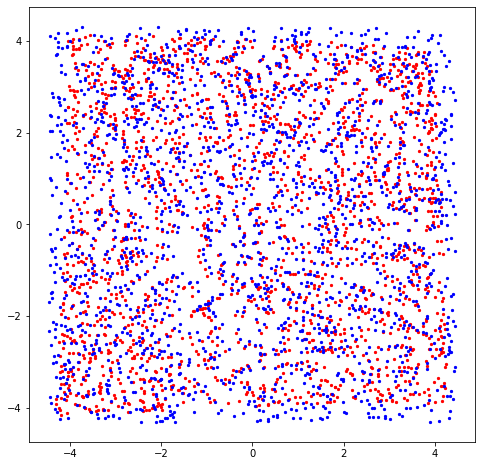

In [5]:
# plot the predicted points and ground truth points
plt.rcParams["figure.figsize"] = (8,8)

plt.scatter(x_1[:,0], x_1[:,1] ,s = 5, c = 'red')
plt.scatter(pred[:,0], pred[:,1] ,s = 5, c = 'blue')
plt.show()

100%|██████████| 2000/2000 [00:06<00:00, 324.66it/s]


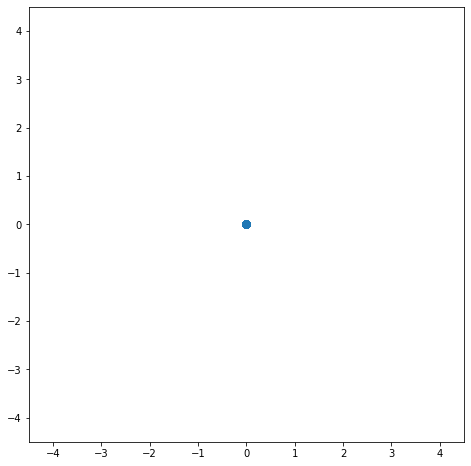

In [36]:
# Predict x1 with a larger time to find the steady states
def f(t, x):
    fx = A @ x
    return fx

w=4.5
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-w, w)
ax.set_ylim(-w, w)

t = 10
x1_pred = []
for i in tqdm(range(len(x_0))):
    y = solve_ivp(f, (0, t), x_0[i], t_eval=np.array([t])).y
    x1_pred.append(np.ndarray.flatten(y))
x1_pred = np.array(x1_pred)
ax.scatter(x1_pred[:, 0], x1_pred[:, 1], s = 50)
ax.set_aspect(1)
plt.show()

## Task 2

In [29]:
# create some basis
Y, X = np.mgrid[-w:w:complex(0, 33), -w:w:complex(0, 33)]
basis = np.array([[X[i][j], Y[i][j]] for i in range(len(X)) for j in range(len(Y))])

# nonlinear approximation
ep = 2.6
phi = np.exp(-((x_0.reshape(N, 1, d) - basis) ** 2).sum(-1) / ep )
C, res, rank, sigma = np.linalg.lstsq(phi, v, rcond=-1) # solution, residual, rank, singular values

# mean square error
pred_2 = x_0 + (phi @ C) * dt
mse = ((x_1 - pred_2) ** 2).sum() / N
mse

2.846574820582886e-16

In [28]:
# search for a better epsilon
for i in range(1, 21):
    Y, X = np.mgrid[-w:w:complex(0, 33), -w:w:complex(0, 33)]
    basis = np.array([[X[i][j], Y[i][j]] for i in range(len(X)) for j in range(len(Y))])

    ep = 0.01*i + 2.5
    phi = np.exp(-((x_0.reshape(N, 1, d) - basis) ** 2).sum(-1) / ep )
    C, res, rank, sigma = np.linalg.lstsq(phi, v, rcond=-1) # solution, residual, rank, singular values

    pred_2 = x_0 + (phi @ C) * dt
    mse = ((x_1 - pred_2) ** 2).sum() / N
    print('ep=', ep, 'mse=',mse)

ep= 2.51 mse= 3.337386010143334e-16
ep= 2.52 mse= 3.227510383458132e-16
ep= 2.53 mse= 3.1936725615988517e-16
ep= 2.54 mse= 3.0132241706213703e-16
ep= 2.55 mse= 2.99095188307536e-16
ep= 2.56 mse= 3.048307116838884e-16
ep= 2.57 mse= 2.913861490016468e-16
ep= 2.58 mse= 9.615582760224873e-16
ep= 2.59 mse= 2.9484704486455016e-16
ep= 2.6 mse= 2.846574820582886e-16
ep= 2.61 mse= 2.920790773596084e-16
ep= 2.62 mse= 3.056610055767405e-16
ep= 2.63 mse= 3.0849661178025357e-16
ep= 2.64 mse= 3.135404690670742e-16
ep= 2.65 mse= 2.957236070576653e-16
ep= 2.66 mse= 3.0576371310758317e-16
ep= 2.67 mse= 2.910044725251899e-16
ep= 2.68 mse= 2.956378493749759e-16
ep= 2.69 mse= 2.891692129176458e-16
ep= 2.7 mse= 3.37680888309893e-16


In [21]:
# search for a better number of basis
for i in range(1, 34):
    Y, X = np.mgrid[-w:w:complex(0, i), -w:w:complex(0, i)]
    basis = np.array([[X[i][j], Y[i][j]] for i in range(len(X)) for j in range(len(Y))])

    ep = 0.03
    phi = np.exp(-((x_0.reshape(N, 1, d) - basis) ** 2).sum(-1) / ep )
    C, res, rank, sigma = np.linalg.lstsq(phi, v, rcond=-1) # solution, residual, rank, singular values

    pred_2 = x_0 + (phi @ C) * dt
    mse = ((x_1 - pred_2) ** 2).sum() / N
    print(X.shape, mse)

(1, 1) 0.05044055274800631
(2, 2) 0.04959310637613734
(3, 3) 0.04876018699181958
(4, 4) 0.047311463743431516
(5, 5) 0.04609821333572297
(6, 6) 0.04439544551019843
(7, 7) 0.04360343198545131
(8, 8) 0.04181787128653219
(9, 9) 0.04009140545519506
(10, 10) 0.03789349585256339
(11, 11) 0.03370878341844892
(12, 12) 0.03288617636846311
(13, 13) 0.02984718038231324
(14, 14) 0.026512323726166
(15, 15) 0.023589244814042846
(16, 16) 0.018918490680650223
(17, 17) 0.016393611559874597
(18, 18) 0.012781418049572234
(19, 19) 0.010027994918356313
(20, 20) 0.008149418052372464
(21, 21) 0.006177964078552235
(22, 22) 0.004704192259910371
(23, 23) 0.0035252239471066297
(24, 24) 0.002281772867875073
(25, 25) 0.00168899023787281
(26, 26) 0.0011031407731256454
(27, 27) 0.0006906001361854639
(28, 28) 0.00045187032817898154
(29, 29) 0.00031579284684994587
(30, 30) 0.0001844792732005691
(31, 31) 0.00010847495345395377
(32, 32) 6.193175016549144e-05
(33, 33) 3.7893102366691287e-05


<AxesSubplot:>

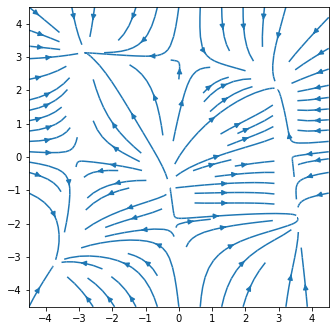

In [30]:
# plot the phase portrait for non-linear system
plot_phase_portrait_nonlinear(C, basis, X, Y, ep)

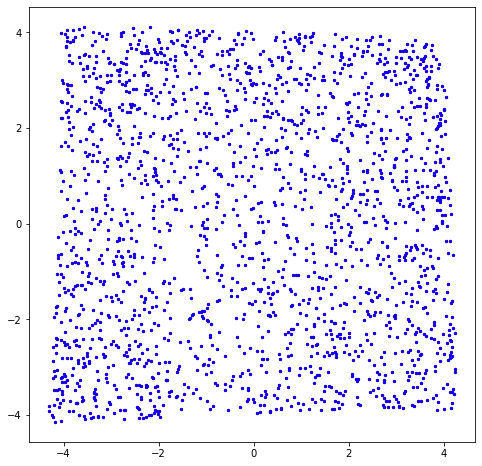

In [31]:
# plot the predicted points and ground truth points
plt.rcParams["figure.figsize"] = (8,8)
plt.scatter(x_1[:,0], x_1[:,1] ,s = 5, c = 'red')
plt.scatter(pred_2[:,0], pred_2[:,1] ,s = 5, c = 'blue')
plt.show()

## Task 3

100%|██████████| 2000/2000 [02:59<00:00, 11.14it/s]


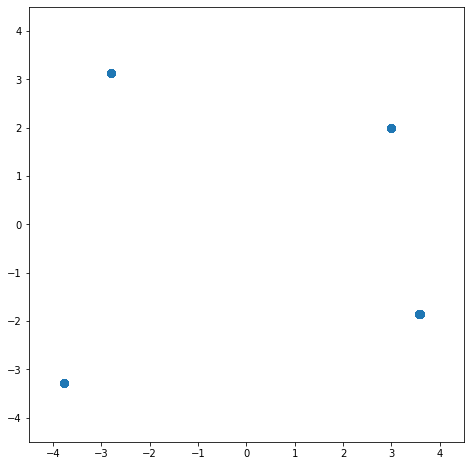

In [35]:
# approximation with a larger time to find steadt points
def f_(t, x):
    phi_ = np.exp(-((x.reshape(-1, 1, d) - basis) ** 2).sum(-1) / ep)
    fx = phi_ @ C
    return fx

w=4.5
fig = plt.figure()
ax = fig.add_subplot()
ax.set_xlim(-w, w)
ax.set_ylim(-w, w)

t = 10
x1_pred = []
for i in tqdm(range(len(x_0))):
    y = solve_ivp(f_, (0, t), x_0[i], t_eval=np.array([t])).y
    x1_pred.append(np.ndarray.flatten(y))
x1_pred = np.array(x1_pred)
ax.scatter(x1_pred[:, 0], x1_pred[:, 1], s = 50)
ax.set_aspect(1)
plt.show()